In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%aimport l1linreg

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import normalize

In [4]:
file_paths = ['data/low/triazines', 'data/low/a8a', 'data/high/madelon', 'data/high/gisette_scale']

In [40]:
res = dict()
for k, name in enumerate(file_paths):
    print(name)

    X, y = load_svmlight_file(name)
    X = X.toarray()
    X = normalize(X)
    n, d = X.shape
    
    rc = 1.0 / n
    w0 = np.ones(d)
    w0_p = 2 * np.ones(d)
    w0_m = np.ones(d)
    
    name = name.split('/')[-1]
    
    res[name] = dict()
    
    res[name]['barr'] = l1linreg.barrier(X, y, rc, w0_p, w0_m, trace=True)[2]
    res[name]['subg'] = l1linreg.subgrad(X, y, rc, w0, tol=1e-5, max_iter=2000, trace=True)[2]
    res[name]['prox'] = l1linreg.prox_grad(X, y, rc, w0, max_iter=2000, trace=True)[2]
    res[name]['shape'] = X.shape

data/low/triazines
data/low/a8a
data/high/madelon
data/high/gisette_scale


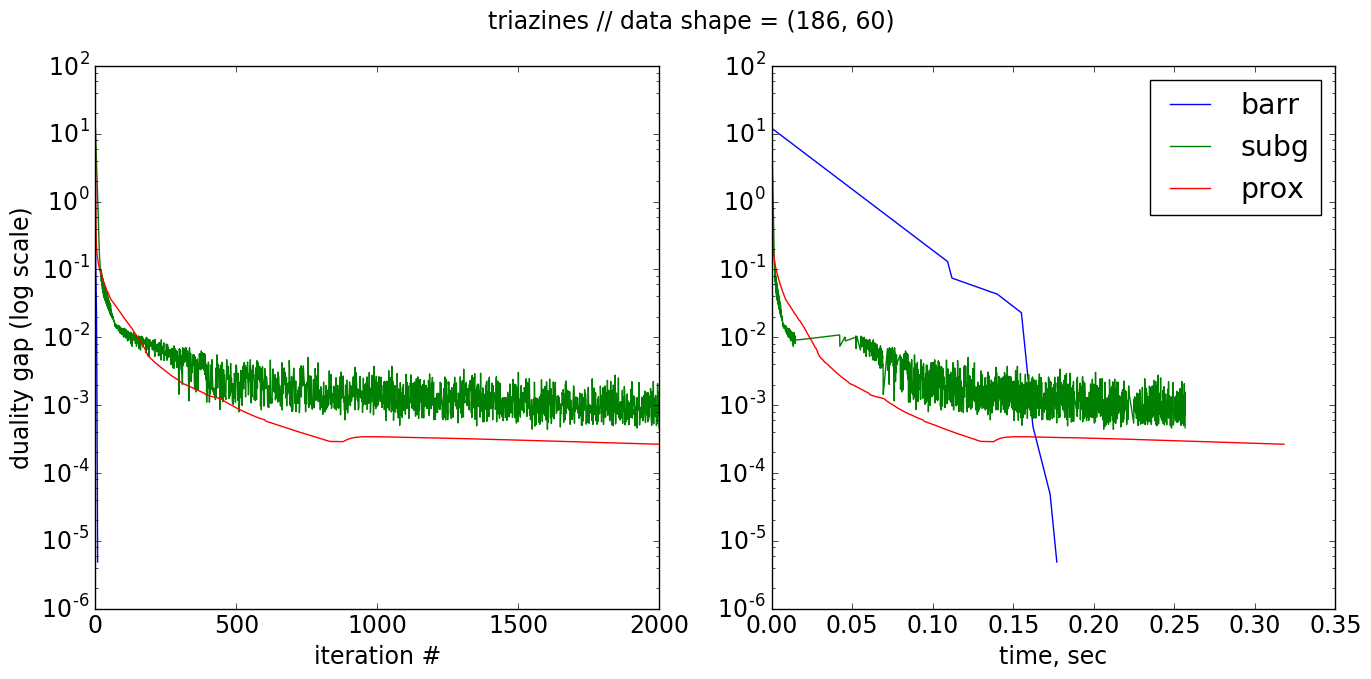

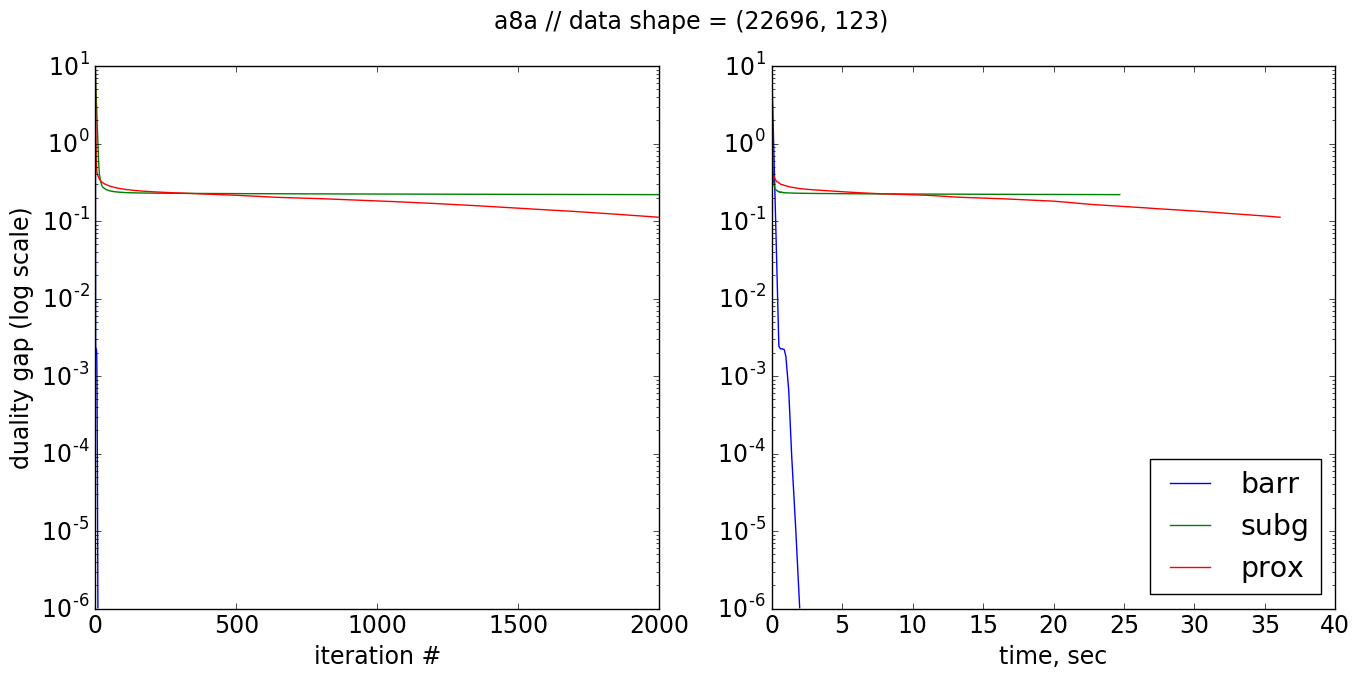

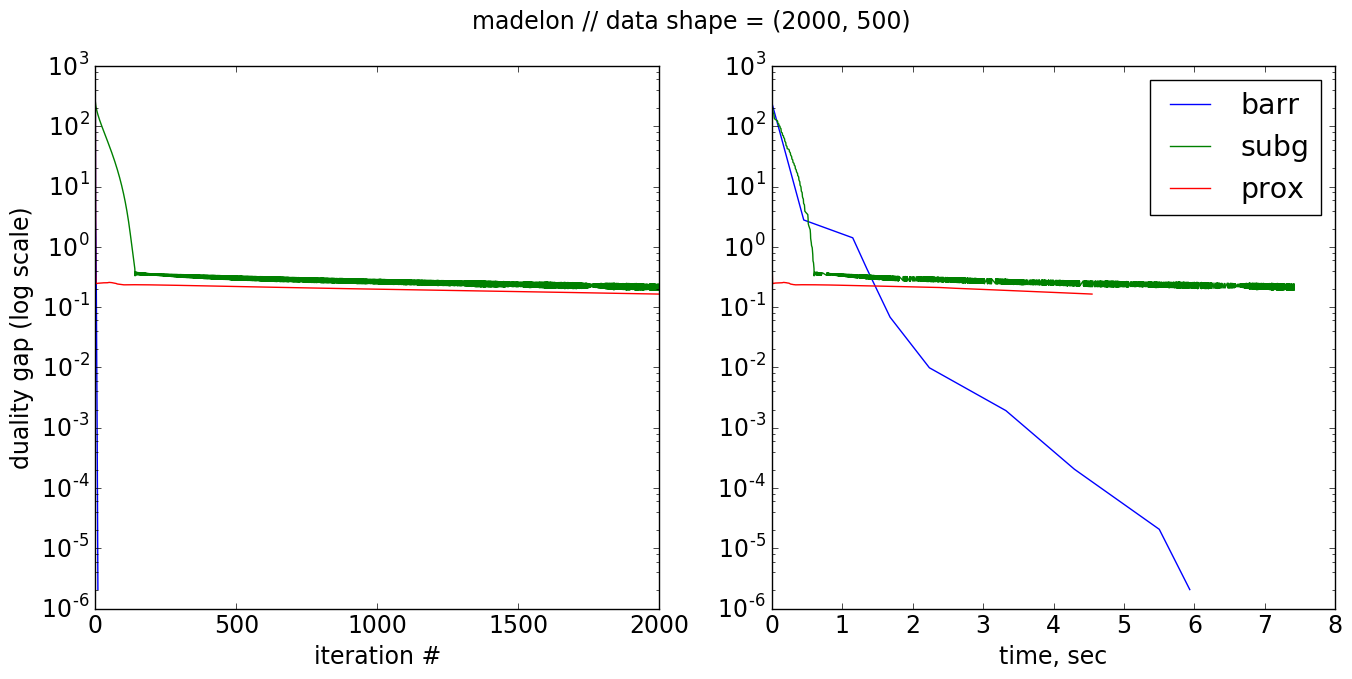

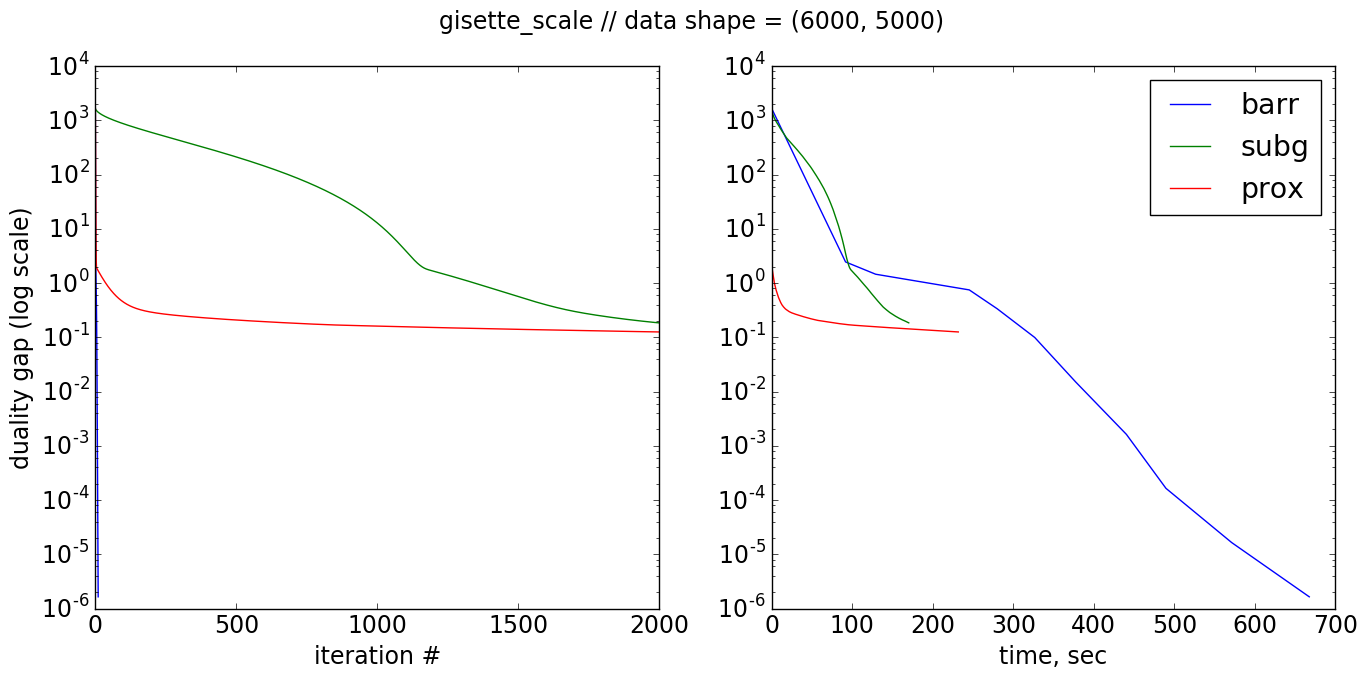

In [41]:
plt.rcParams.update({'font.size': 17})
for name in file_paths:
    name = name.split('/')[-1]
    plt.figure(figsize=(16, 7))
    for meth in ['barr', 'subg', 'prox']:
        hist = res[name][meth]

        plt.subplot(121)
        plt.semilogy(hist['dual_gap'], label=meth)
        plt.xlabel('iteration #')
        plt.ylabel('duality gap (log scale)')
        
        plt.subplot(122)
        plt.semilogy(hist['elaps_t'], hist['dual_gap'], label=meth)
        plt.xlabel('time, sec')
#         plt.ylabel('residual (log scale)')
    
    plt.suptitle("%s // data shape = %s " % (name, res[name]['shape']))
    plt.legend(loc='best')

    plt.savefig("pics/" + name, bbox_inches='tight')
    plt.show()

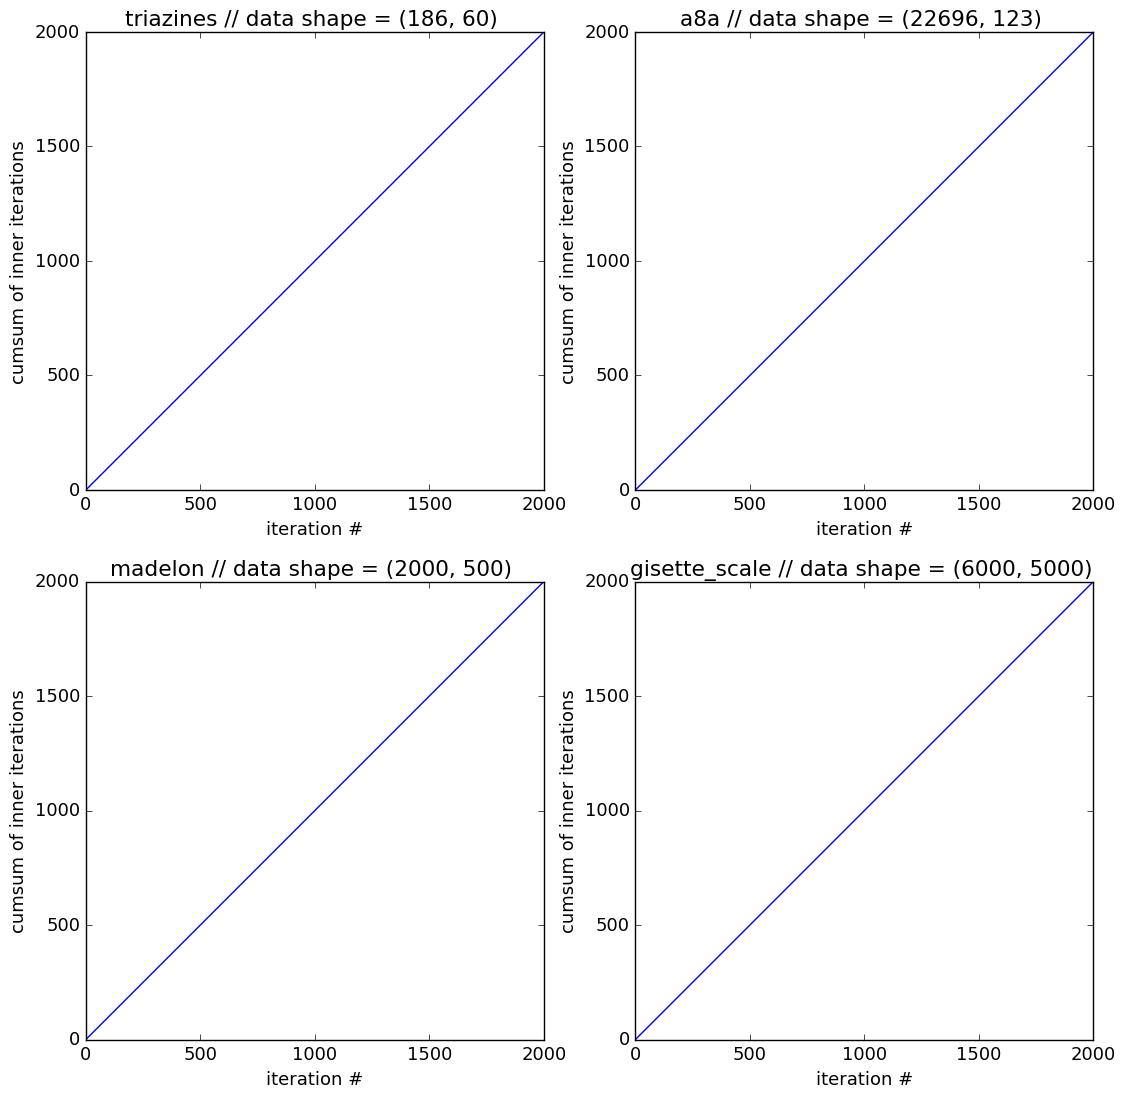

In [38]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(13, 13))
for i, name in enumerate(file_paths):
    name = name.split('/')[-1]
    meth = 'prox'
    hist = res[name][meth]

    plt.subplot(2, 2, i + 1)
    plt.plot(hist['ls_iters'])
    plt.xlabel('iteration #')
    plt.ylabel('cumsum of inner iterations')
    
    plt.title("%s // data shape = %s " % (name, res[name]['shape']))
    
plt.savefig("pics/prox_grad_cumsum", bbox_inches='tight')
plt.show()